In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(patchwork)
library(tibble)
library(qs)
library(ggplot2)
library(ggridges)
library(tidyr)
library(RColorBrewer)
library(readxl)
library(stringr)
library(ggpubr) 
library(viridis)
library(reshape)
library(forestploter)
library(grid)

seed <- 123
set.seed(seed)
options(dplyr.summarise.inform = FALSE)
setwd("~/integration_project/step_14/11march_final/")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.25.6

Loading required package: viridisLite


Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename




In [6]:
layer_val <- read.csv("AT8_layers_forest_val.csv", header = T)
layer_val <- layer_val[-1]
colnames(layer_val)[1] <- "Group"
colnames(layer_val)[15] <- "Group.1"
colnames(layer_val)[23] <- "Group.2"
layer_val

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,-0.07730812,0.05450501,0.1145717,0.1423804,0.2741935,NA,0.137,-0.04077242,0.06563913,⋯,0.5589544,NA,0.0732,Layer II-III,0.15971977,0.27478726,0.3502678,0.3514989,0.4665664,0.0732
Layer II-VI,0.23735119,0.24404762,0.2470238,0.2485119,0.2552083,NA,0.590,0.23385204,0.23794037,⋯,0.3107639,NA,0.2400,Layer II-VI,0.15864305,0.21230559,0.2269107,0.2480806,0.3017432,0.2400
Layer IV-VI,0.17054611,0.30617726,0.3536258,0.3965980,0.5322292,NA,0.386,0.08279707,0.25916590,⋯,0.1786034,NA,0.0300,Layer IV-VI,0.01680002,0.09867076,0.1238877,0.1532512,0.2351220,0.0300


In [7]:
layer_val$Homeo_Level0_pval <- format(layer_val$Homeo_Level0_pval, scientific = TRUE)
layer_val$Act_Level0_pval <- format(layer_val$Act_Level0_pval, scientific = TRUE)
layer_val

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,-0.07730812,0.05450501,0.1145717,0.1423804,0.2741935,NA,1.37e-01,-0.04077242,0.06563913,⋯,0.5589544,NA,7.32e-02,Layer II-III,0.15971977,0.27478726,0.3502678,0.3514989,0.4665664,0.0732
Layer II-VI,0.23735119,0.24404762,0.2470238,0.2485119,0.2552083,NA,5.90e-01,0.23385204,0.23794037,⋯,0.3107639,NA,2.40e-01,Layer II-VI,0.15864305,0.21230559,0.2269107,0.2480806,0.3017432,0.2400
Layer IV-VI,0.17054611,0.30617726,0.3536258,0.3965980,0.5322292,NA,3.86e-01,0.08279707,0.25916590,⋯,0.1786034,NA,3.00e-02,Layer IV-VI,0.01680002,0.09867076,0.1238877,0.1532512,0.2351220,0.0300


In [8]:
sample_val <- read.csv("AT8_Sample_forest_val.csv", header = T)
sample_val <- sample_val[-1]
colnames(sample_val)[1] <- "Group"
colnames(sample_val)[15] <- "Group.1"
colnames(sample_val)[23] <- "Group.2"
sample_val

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,0.01943005,0.03108808,0.03626943,0.0388601,0.05051813,NA,1.51e-02,-0.089375370,0.08784810,⋯,0.8937824,NA,5.84e-05,AD-1,0.1209226,0.2096628,0.2445624,0.2688229,0.3575631,5.84e-05
AD-2,-0.23738872,0.03857567,0.16913947,0.2225519,0.49851632,NA,6.78e-05,-0.007799705,0.02897423,⋯,0.4525223,NA,3.49e-03,AD-2,0.1832282,0.3397751,0.3737853,0.4441396,0.6006865,3.49e-03
AD-3,0.01704545,0.13636364,0.19318182,0.2159091,0.33522727,NA,1.53e-02,-0.051882006,0.06824997,⋯,0.4204545,NA,7.01e-01,AD-3,0.1389615,0.2512505,0.3105514,0.3261098,0.4383989,7.01e-01


In [9]:
sample_val$Homeo_Level0_pval <- format(sample_val$Homeo_Level0_pval, scientific = TRUE)
sample_val$Act_Level0_pval <- format(sample_val$Act_Level0_pval, scientific = TRUE)
sample_val

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,0.01943005,0.03108808,0.03626943,0.0388601,0.05051813,NA,1.51e-02,-0.089375370,0.08784810,⋯,0.8937824,NA,5.84e-05,AD-1,0.1209226,0.2096628,0.2445624,0.2688229,0.3575631,5.84e-05
AD-2,-0.23738872,0.03857567,0.16913947,0.2225519,0.49851632,NA,6.78e-05,-0.007799705,0.02897423,⋯,0.4525223,NA,3.49e-03,AD-2,0.1832282,0.3397751,0.3737853,0.4441396,0.6006865,3.49e-03
AD-3,0.01704545,0.13636364,0.19318182,0.2159091,0.33522727,NA,1.53e-02,-0.051882006,0.06824997,⋯,0.4204545,NA,7.01e-01,AD-3,0.1389615,0.2512505,0.3105514,0.3261098,0.4383989,7.01e-01


In [10]:
both <- rbind(layer_val, sample_val)
both$Homeostatic <- "" # Any NA to blank
both$Activated <- ""
both

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,-0.07730812,0.05450501,0.11457175,0.1423804,0.27419355,,1.37e-01,-0.040772422,0.06563913,⋯,0.5589544,,7.32e-02,Layer II-III,0.15971977,0.27478726,0.3502678,0.3514989,0.4665664,7.32e-02
Layer II-VI,0.23735119,0.24404762,0.24702381,0.2485119,0.25520833,,5.90e-01,0.233852036,0.23794037,⋯,0.3107639,,2.40e-01,Layer II-VI,0.15864305,0.21230559,0.2269107,0.2480806,0.3017432,2.40e-01
Layer IV-VI,0.17054611,0.30617726,0.35362578,0.3965980,0.53222919,,3.86e-01,0.082797066,0.25916590,⋯,0.1786034,,3.00e-02,Layer IV-VI,0.01680002,0.09867076,0.1238877,0.1532512,0.2351220,3.00e-02
AD-1,0.01943005,0.03108808,0.03626943,0.0388601,0.05051813,,1.51e-02,-0.089375370,0.08784810,⋯,0.8937824,,5.84e-05,AD-1,0.12092261,0.20966279,0.2445624,0.2688229,0.3575631,5.84e-05
AD-2,-0.23738872,0.03857567,0.16913947,0.2225519,0.49851632,,6.78e-05,-0.007799705,0.02897423,⋯,0.4525223,,3.49e-03,AD-2,0.18322825,0.33977508,0.3737853,0.4441396,0.6006865,3.49e-03
AD-3,0.01704545,0.13636364,0.19318182,0.2159091,0.33522727,,1.53e-02,-0.051882006,0.06824997,⋯,0.4204545,,7.01e-01,AD-3,0.13896146,0.25125049,0.3105514,0.3261098,0.4383989,7.01e-01


In [11]:
library ("berryFunctions")


Attaching package: ‘berryFunctions’


The following object is masked from ‘package:dplyr’:

    between




In [12]:
both <-  insertRows(both, c(1,5) , new = "")
both

,Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,,,,,,,,,,,⋯,,,,,,,,,,
2,Layer II-III,-0.0773081201334817,0.0545050055617353,0.114571746384872,0.14238042269188,0.274193548387097,,1.37e-01,-0.0407724223745797,0.0656391324411629,⋯,0.558954393770857,,7.32e-02,Layer II-III,0.159719768387281,0.274787258004263,0.350267761003802,0.351498917748918,0.4665664073659,0.0732
3,Layer II-VI,0.23735119047619,0.244047619047619,0.24702380952381,0.248511904761905,0.255208333333333,,5.90e-01,0.233852036046764,0.237940368485386,⋯,0.310763888888889,,2.40e-01,Layer II-VI,0.158643052411897,0.212305593136569,0.226910742927835,0.248080620286351,0.301743161011023,0.24
4,Layer IV-VI,0.170546105640107,0.306177260519248,0.353625783348254,0.396598030438675,0.532229185317816,,3.86e-01,0.0827970662565506,0.259165903362645,⋯,0.178603401969561,,3.00e-02,Layer IV-VI,0.0168000237912218,0.098670757978021,0.123887662332682,0.153251247435887,0.235121981622686,0.03
5,,,,,,,,,,,⋯,,,,,,,,,,
6,AD-1,0.0194300518134715,0.0310880829015544,0.0362694300518135,0.038860103626943,0.0505181347150259,,1.51e-02,-0.0893753698264976,0.0878480959308027,⋯,0.893782383419689,,5.84e-05,AD-1,0.120922613309831,0.209662789174067,0.244562392494723,0.268822906416891,0.357563082281127,5.84e-05
7,AD-2,-0.237388724035608,0.0385756676557863,0.169139465875371,0.222551928783383,0.498516320474777,,6.78e-05,-0.00779970520799214,0.0289742329948684,⋯,0.452522255192878,,3.49e-03,AD-2,0.183228245441642,0.339775084616224,0.373785347745387,0.444139644065946,0.600686483240529,0.00349
8,AD-3,0.0170454545454545,0.136363636363636,0.193181818181818,0.215909090909091,0.335227272727273,,1.53e-02,-0.0518820056982993,0.0682499719068197,⋯,0.420454545454545,,7.01e-01,AD-3,0.138961455431408,0.251250489500186,0.310551393229546,0.326109845546038,0.438398879614815,0.701


In [13]:
both$Group = c("Layers","   Layer II-III","   Layer II-VI","   Layer IV-VI","Samples","   AD-1","   AD-2","   AD-3")

In [14]:
both[c(1,3,2,4:8),c(1,7,8,21,22)]

,Group,Homeostatic,Homeo_Level0_pval,Activated,Act_Level0_pval
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Layers,,,,
3,Layer II-VI,,5.90e-01,,2.40e-01
2,Layer II-III,,1.37e-01,,7.32e-02
4,Layer IV-VI,,3.86e-01,,3.00e-02
5,Samples,,,,
6,AD-1,,1.51e-02,,5.84e-05
7,AD-2,,6.78e-05,,3.49e-03
8,AD-3,,1.53e-02,,7.01e-01


In [15]:
write.csv(both, "AT8_check2.csv")

Export to excel

In [2]:
both <- read_excel("/home/a.garg/integration_project/step_14/11march_final/AT8_check2.xlsx", sheet = "Sheet 1 - AT8_check2", .name_repair = "minimal")
both

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layers,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Layer II-III,-0.07730812,0.05450501,0.11457175,0.1423804,0.27419355,NA,1.37e-01,-0.040772422,0.06563913,⋯,0.5589544,NA,7.32e-02,Layer II-III,0.15971977,0.27478726,0.3502678,0.3514989,0.4665664,7.32e-02
Layer II-VI,0.23735119,0.24404762,0.24702381,0.2485119,0.25520833,NA,5.90e-01,0.233852036,0.23794037,⋯,0.3107639,NA,2.40e-01,Layer II-VI,0.15864305,0.21230559,0.2269107,0.2480806,0.3017432,2.40e-01
Layer IV-VI,0.17054611,0.30617726,0.35362578,0.3965980,0.53222919,NA,3.86e-01,0.082797066,0.25916590,⋯,0.1786034,NA,3.00e-02,Layer IV-VI,0.01680002,0.09867076,0.1238877,0.1532512,0.2351220,3.00e-02
Samples,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AD-1,0.01943005,0.03108808,0.03626943,0.0388601,0.05051813,NA,1.51e-02,-0.089375370,0.08784810,⋯,0.8937824,NA,5.84e-05,AD-1,0.12092261,0.20966279,0.2445624,0.2688229,0.3575631,5.84e-05
AD-2,-0.23738872,0.03857567,0.16913947,0.2225519,0.49851632,NA,6.78e-05,-0.007799705,0.02897423,⋯,0.4525223,NA,3.49e-03,AD-2,0.18322825,0.33977508,0.3737853,0.4441396,0.6006865,3.49e-03
AD-3,0.01704545,0.13636364,0.19318182,0.2159091,0.33522727,NA,1.53e-02,-0.051882006,0.06824997,⋯,0.4204545,NA,7.01e-01,AD-3,0.13896146,0.25125049,0.3105514,0.3261098,0.4383989,7.01e-01


In [3]:
both$Homeostatic <- "" # Any NA to blank
both$Activated <- ""

In [4]:
colnames(both) %>%as.list

[[1]]
[1] "Group"

[[2]]
[1] "Homeo_Level0_min"

[[3]]
[1] "Homeo_Level0_q1"

[[4]]
[1] "Homeo_Level0_med"

[[5]]
[1] "Homeo_Level0_q3"

[[6]]
[1] "Homeo_Level0_max"

[[7]]
[1] "Homeostatic"

[[8]]
[1] "Homeo_Level0_pval"

[[9]]
[1] "Homeo_Other_min"

[[10]]
[1] "Homeo_Other_q1"

[[11]]
[1] "Homeo_Other_med"

[[12]]
[1] "Homeo_Other_q3"

[[13]]
[1] "Homeo_Other_max"

[[14]]
[1] "Homeo_Other_pval"

[[15]]
[1] "Group.1"

[[16]]
[1] "Act_Level0_min"

[[17]]
[1] "Act_Level0_q1"

[[18]]
[1] "Act_Level0_med"

[[19]]
[1] "Act_Level0_q3"

[[20]]
[1] "Act_Level0_max"

[[21]]
[1] "Activated"

[[22]]
[1] "Act_Level0_pval"

[[23]]
[1] "Group.2"

[[24]]
[1] "Act_Other_min"

[[25]]
[1] "Act_Other_q1"

[[26]]
[1] "Act_Other_med"

[[27]]
[1] "Act_Other_q3"

[[28]]
[1] "Act_Other_max"

[[29]]
[1] "Act_Other_pval"

In [5]:
colnames(both)[8] <- "Pval"
colnames(both)[22] <- "Pval"

In [8]:
tm <- forest_theme(base_size = 10,
                   refline_lty = "dotted",
                   ci_pch = c(15, 18),
                     ci_alpha = 0.8,
                   ci_lty = 1,
                   ci_lwd = 1.5,
                   ci_Theight = 0.2, # Set an T end at the end of CI 
                   ci_col = c("#000000","#808080"),
                   footnote_col = "blue",
                   legend_name = "",
                   legend_value = c("Proximal", "Distal"),
                   core=list(
                    padding = unit(c(4, 3), "mm"),
                    fg_params=list(hjust = 1, x = 0.9)
                    #bg_params=list(fill = c("#C0C0C0","#F5F5F5"))
                    ),
                   colhead=list(fg_params=list(hjust=0.5, x=0.5))
                   
                   )



In [7]:
both <- both[c(1,3,2,4:8),]

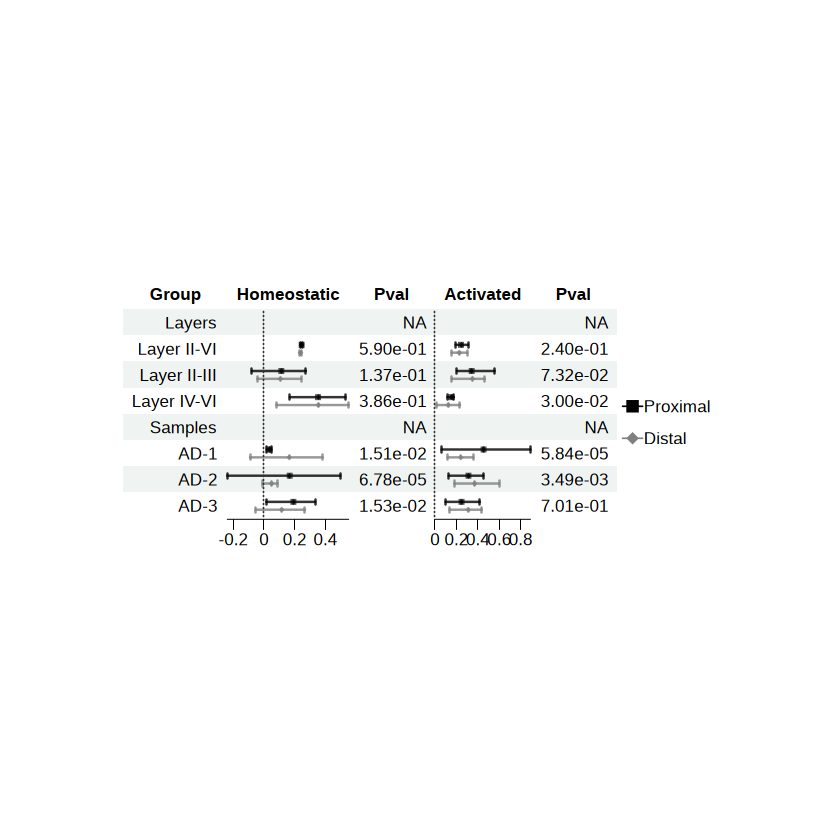

In [10]:
p <- forest(both[,c(1,7,8,21,22)],
est = list(both$Homeo_Level0_med,both$Act_Level0_med,both$Homeo_Other_med,both$Act_Other_med),
lower = list(both$Homeo_Level0_min,both$Act_Level0_min,both$Homeo_Other_min,both$Act_Other_min),
upper = list(both$Homeo_Level0_max,both$Act_Level0_max,both$Homeo_Other_max,both$Act_Other_max),
            ci_column = c(2, 4),
           ref_line = 0,
           # vert_line = c(0.5, 2),
            nudge_y = 0.3,
            theme = tm)
ggsave(p,filename = "AT8_Forestplot_both_sampleandlayers.pdf",height = 4, width = 7, bg = "white")
p

In [68]:
tm <- forest_theme(base_size = 10,
                   refline_lty = "dotted",
                   ci_pch = c(15, 18),
                   ci_col = c("#000000","red"),
                   footnote_col = "blue",
                   legend_name = "",
                   legend_value = c("Proximal", "Distal"),
                   vertline_lty = c("dashed", "dotted"),
                   vertline_col = c("#cccccc", "#8c8c8c"),
                   # TAT8le cell padding, width 4 and heights 3
                   core = list(padding = unit(c(5, 5), "mm")))

In [53]:
as.numeric(both$Homeo_Level0_med,both$Act_Level0_med)
as.numeric(both$Homeo_Other_med,both$Act_Other_med)

[1]         NA 0.08300908 0.19416058 0.34724541         NA 0.05167173 0.11600000
[8] 0.09375000

[1]        NA 0.1378800 0.2747092 0.3627178        NA 0.1164241 0.1500449
[8] 0.1513505

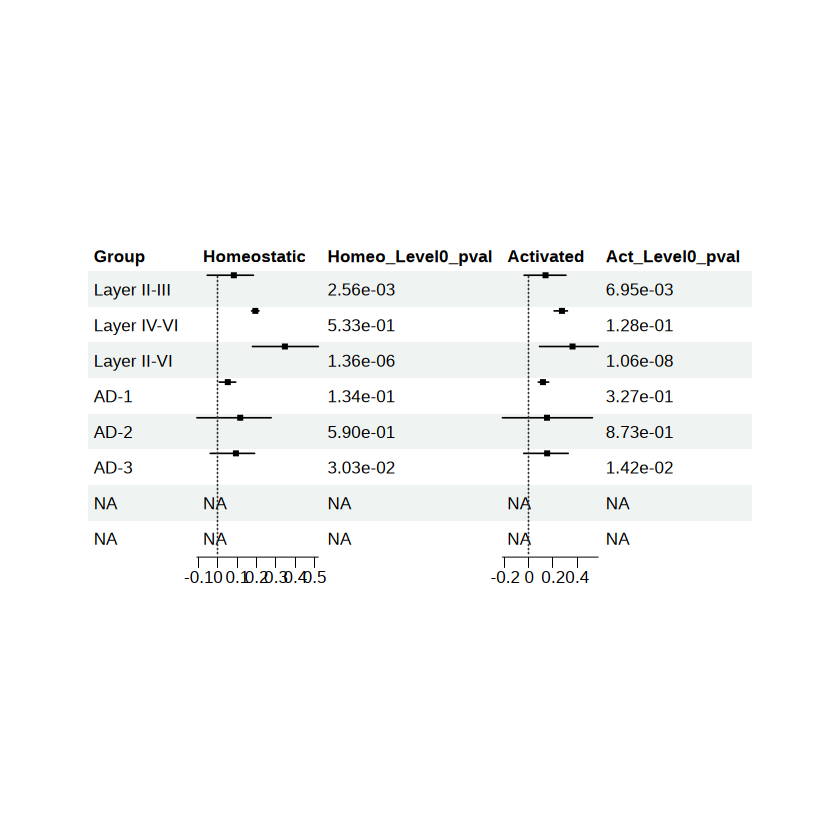

In [69]:
p <- forest(both[c(1,3,2,4:8),c(1,7,8,21,22)],
est = list(as.numeric(both$Homeo_Level0_med,both$Act_Level0_med),as.numeric(both$Homeo_Other_med,both$Act_Other_med)),
lower = list(as.numeric(both$Homeo_Level0_min,both$Act_Level0_min),as.numeric(both$Homeo_Other_min,both$Act_Other_min)),
upper = list(as.numeric(both$Homeo_Level0_max,both$Act_Level0_max),as.numeric(both$Homeo_Other_max,both$Act_Other_max)),
            ci_column = c(2, 4),
           ref_line = 0,
           # vert_line = c(0.5, 2),
            nudge_y = 0.4,
            theme = tm)
            p

ERROR: Error in forest_theme(base_size = 10, refline_lty = "dotted", ci_pch = c(15, : could not find function "forest_theme"


In [ ]:
both$Homeostatic <- "" # Any NA to blank
both$Activated <- ""

In [ ]:
both$Homeo_Level0_pval <- replace(both$Homeo_Level0_pval, is.na(both$Homeo_Level0_pval), "")
both$Act_Level0_pval <- replace(both$Act_Level0_pval, is.na(both$Act_Level0_pval), "")